<a href="https://colab.research.google.com/github/anirudhjaju/Decision-Tree-Algorithm/blob/main/Decision_Tree_Plot_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(100)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,100.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df=df.dropna()

In [ ]:
df1=df.drop(['Loan_ID'],axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,100.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df2=pd.get_dummies(df1,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,100.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1


In [ ]:
df3=df2.drop(['Loan_Status_Y','Property_Area_Urban','Self_Employed_Yes','Education_Graduate','Dependents_3+','Married_No','Gender_Male'],axis='columns')
df3.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_N
0,5849,0.0,100.0,360.0,1.0,0,0,1,0,0,0,1,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,1,0,1
2,3000,0.0,66.0,360.0,1.0,0,1,1,0,0,0,0,0,0,0
3,2583,2358.0,120.0,360.0,1.0,0,1,1,0,0,1,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,0,0,1,0,0,0,1,0,0,0


In [ ]:
x=df3.drop(['Loan_Status_N'],axis='columns')
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban
0,5849,0.0,100.0,360.0,1.0,0,0,1,0,0,0,1,0,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,1,0,0,0,0,0,0
3,2583,2358.0,120.0,360.0,1.0,0,1,1,0,0,1,1,0,0
4,6000,0.0,141.0,360.0,1.0,0,0,1,0,0,0,1,0,0


In [ ]:
y=df3['Loan_Status_N']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status_N, dtype: uint8

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model=dtc.fit(xtrain,ytrain)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dtc.predict(xtest)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,ytest))

0.744


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,ytest))

[[71 22]
 [10 22]]


'tree.pdf'

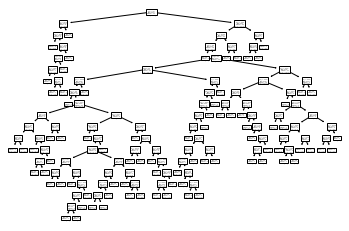

In [ ]:
from sklearn import tree
tree.plot_tree(dtc)
import graphviz
dot_data=tree.export_graphviz(dtc,out_file=None)
graph=graphviz.Source(dot_data)
graph.render('tree')